Тестовое задание на позицию “Аналитик данных”
 
Имеется набор данных. Необходимо проанализировать его и представить ответы на вопросы с визуализацией каждого пункта.
 Ссылка: https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/edit?usp=sharing
 
Задание 1
 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
 б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

 Подгруппа – Sub-Category
 Дата – Order_date
 Сделать вывод на основе полученных результатов.

 Задание 2
 Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

 Задание 3
 Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

 Замечания: Работу лучше выполнить в jupyter и там же написать выводы по каждому заданию. После выполнения загрузите код на github.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
pth1 = 'qwerty_df_testtask_for_analyst_job.xlsx'
pth2 = '...'
if os.path.isfile(pth1):
    df = pd.read_excel(pth1, parse_dates=['Order Date'])
    print(df.head())
elif os.path.exists(pth2):
    df = pd.read_excel(pth2, parse_dates=['Order Date'])
    print(df.head())
else: print('File not found')

     ID Order Date     Class       Region Sub-Category     Sales
0   646 2018-12-30  Стандарт         Урал   Appliances  37229.08
1   907 2018-12-30  Стандарт  Владивосток    Bookcases  20994.61
2   908 2018-12-30  Стандарт  Владивосток       Phones  42133.86
3   909 2018-12-30  Стандарт  Владивосток      Binders  10612.00
4  1297 2018-12-30  Стандарт   Калиниград      Binders  28781.13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


In [7]:
df.describe(include='all')

,ID,Order Date,Class,Region,Sub-Category,Sales
count,9800.000000,9800,9800,9800,9800,9800.000000
unique,NaN,NaN,4,4,17,NaN
top,NaN,NaN,Стандарт,Калиниград,Binders,NaN
freq,NaN,NaN,5859,3140,1492,NaN
mean,4900.500000,2017-05-01 05:13:51.673469184,NaN,NaN,NaN,22921.757737
min,1.000000,2015-01-03 00:00:00,NaN,NaN,NaN,1002.794000
25%,2450.750000,2016-05-24 00:00:00,NaN,NaN,NaN,12135.625000
50%,4900.500000,2017-06-26 00:00:00,NaN,NaN,NaN,22882.060000
75%,7350.250000,2018-05-15 00:00:00,NaN,NaN,NaN,33730.130000
max,9800.000000,2018-12-30 00:00:00,NaN,NaN,NaN,44995.410000


Задание 1

 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

 б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [13]:
# Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
sub_cat_pivot = df.pivot_table(index='Sub-Category', values='ID', aggfunc='count').sort_values(ascending=False, by='ID')

In [14]:
sub_cat_pivot

,ID
Sub-Category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876
Storage,832
Art,785
Accessories,756
Chairs,607
Appliances,459


In [17]:
# Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
df_2017 = df[df['Order Date'].dt.year == 2017]
df_2018 = df[df['Order Date'].dt.year == 2018]

Sub-Category
Binders        408
Paper          357
Furnishings    247
Phones         220
Storage        209
Accessories    184
Art            179
Chairs         161
Appliances     113
Labels          95
Tables          85
Envelopes       59
Supplies        59
Fasteners       58
Bookcases       54
Machines        32
Copiers         14
Name: ID, dtype: int64

In [19]:
df_2017_2018 = pd.concat([df_2017, df_2018])

df_2017_2018.groupby('Sub-Category')['ID'].count().sort_values(ascending=False)

Sub-Category
Binders        900
Paper          809
Furnishings    557
Phones         510
Storage        490
Art            458
Accessories    450
Chairs         348
Appliances     274
Labels         208
Tables         189
Envelopes      130
Bookcases      130
Fasteners      121
Supplies       117
Machines        65
Copiers         36
Name: ID, dtype: int64

 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [20]:
df_2018.groupby('Sub-Category')['ID'].count().sort_values(ascending=False)

Sub-Category
Binders        492
Paper          452
Furnishings    310
Phones         290
Storage        281
Art            279
Accessories    266
Chairs         187
Appliances     161
Labels         113
Tables         104
Bookcases       76
Envelopes       71
Fasteners       63
Supplies        58
Machines        33
Copiers         22
Name: ID, dtype: int64

Задание 2

 Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

In [22]:
def hist_underbox(data,title=None):
    custom_params = {"axes.spines.right": False, "axes.spines.top": False};
    sns.set_theme(style="darkgrid", rc=custom_params);
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                        gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x=data, ax=ax_box).set_title(title)
    sns.histplot(x=data, ax=ax_hist, kde=True)
    ax_box.set(yticks=[])
    ax_box.set_xlabel("")
    ax_hist.set_ylabel("Количество")
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    mean = ax_hist.axvline(data.mean(), color='r', lw=2)
    median = ax_hist.axvline(data.median(), color='k', ls='--', lw=2)
    ax_hist.legend([mean, median], [f'Среднее значение = {round(data.mean(),2)}',
                                    f'Медиана = {round(data.median(),2)}'],
                                    loc='best')

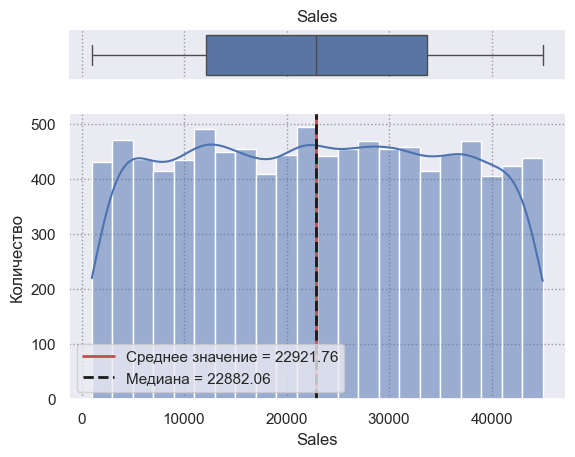

In [23]:
hist_underbox(df['Sales'], title='Sales')

In [27]:
# 95-percentile
df['Sales'].quantile(0.95).round(2)

42739.35

In [28]:
# 5-percentile
df['Sales'].quantile(0.05).round(2)

3268.7

Задание 3

 Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [31]:
df.columns.values.tolist()

['ID', 'Order Date', 'Class', 'Region', 'Sub-Category', 'Sales']

In [40]:
import pandas as pd
import numpy as np

# Разделите продажи на группы "Sale_group"
df['Sale_group'] = np.where(df['Sales'] < df['Sales'].quantile(0.25), 'Маленькие продажи',
                            np.where(df['Sales'] < df['Sales'].quantile(0.75), 'Средние продажи', 'Высокие продажи'))

# Группируйте данные на основе региона и группы продаж
grouped = df.groupby(['Region', 'Sale_group'])

# Вычислите основные тенденции и паттерны для каждой группы
trends = grouped.agg({'Sales': ['mean', 'max', 'min', 'count','sum']})

# Выделите наиболее "прибыльную" группу
most_profitable_group = trends['Sales']['sum'].idxmax()

# Возвратите результаты
print(most_profitable_group)



('Калиниград', 'Средние продажи')


In [39]:
trends

Sales                             \
                                       mean       max        min count   
Region      Sale_group                                                   
Владивосток Высокие продажи    39320.533162  44990.44  33754.580   718   
            Маленькие продажи   6493.573587  12103.28   1003.082   715   
            Средние продажи    22986.419349  33705.91  12147.710  1352   
Калиниград  Высокие продажи    39432.981997  44986.26  33746.770   756   
            Маленькие продажи   6643.589742  12124.95   1021.104   763   
            Средние продажи    22856.203800  33718.70  12145.310  1621   
Москва      Высокие продажи    39162.600288  44995.41  33732.890   417   
            Маленькие продажи   6449.800673  12135.04   1012.536   392   
            Средние продажи    22854.911698  33724.31  12135.820   789   
Урал        Высокие продажи    39252.768730  44942.31  33733.070   559   
            Маленькие продажи   6636.983200  12115.65   1002.794   580   
            Средние продажи    22905.834552  33729.21  12141.220  1138   

                                             
                                        sum  
Region      Sale_group                       
Владивосток Высокие продажи    2.823214e+07  
            Маленькие продажи  4.642905e+06  
            Средние продажи    3.107764e+07  
Калиниград  Высокие продажи    2.981133e+07  
            Маленькие продажи  5.069059e+06  
            Средние продажи    3.704991e+07  
Москва      Высокие продажи    1.633080e+07  
            Маленькие продажи  2.528322e+06  
            Средние продажи    1.803253e+07  
Урал        Высокие продажи    2.194230e+07  
            Маленькие продажи  3.849450e+06  
            Средние продажи    2.606684e+07

# Вывод

1. Вывод по первому заданию:

а) Binders	Paper Furnishings	Phones
б) Binders	Paper Furnishings	Phones
в) Binders	Paper Furnishings	Phones

2. Вывод по второму заданию:

90% данных находится между 3268.7 и 42739.35 по значению в столбце Sales

3. Вывод по третьему заданию:

- построена таблица с трендами по регионам
- наиболее прибыльная группа по суммарной выручке – группа "Средние продажи" в городе Калининград.